/Users/anasosa/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anasosa/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anasosa/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anasosa/anaconda/lib/python3.6/site-packages/sklearn/utils/depreca

92.5110132159
90.4347826087


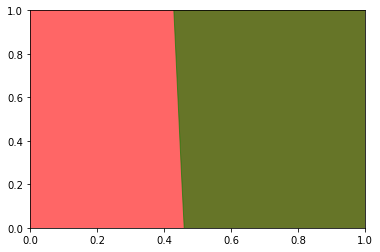

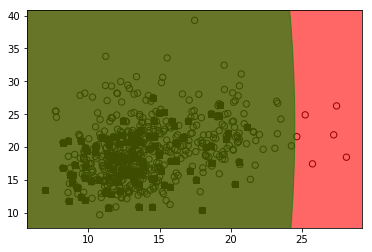

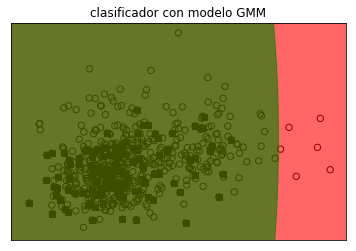

In [5]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches # es para hacer elipses
from sklearn import datasets
from sklearn.mixture import GMM #mixture contiene los modelos de mezclas
from sklearn.cross_validation import StratifiedKFold #validación por K-folds


# cargamos los datos
cancer = datasets.load_breast_cancer()

#realizamos las particiones de los datos para entrenamiento y validacion 80/20
# 100 / 5 = 20 es decir, (100-20) = 80% para entrenamiento
# 100 / 4 = 25 es decir, (100-25) = 75% para entrenamiento
# 100 / 3 = 33.33 (100-33.3 = 66.67) 66.67% para entrenamiento
# 100/2 = 50 es decir, (100-50) = 50% para entrenamiento

# 100- (porcentaje) = espacio de particiones 
# 100 - 80 = 20
# 100/ 20 = 5(n_folds)
indices = StratifiedKFold(cancer.target, n_folds = 5)

#objetos iterables para sacar los indices
train_index,test_index = next(iter(indices))

#extraer los datos del contenido de iris
X_train = cancer.data[train_index]
y_train = cancer.target[train_index]

X_test = cancer.data[test_index]
y_test = cancer.target[test_index]

#calculamos el número de clases
numero_clases = len(np.unique(y_train))

# Construir el clasificador GMM
clasificador = GMM(n_components = numero_clases, covariance_type = 'full', init_params = 'w', n_iter = 20)

# Creo arreglo con las medias
clasificador.means_ = np.array([X_train[y_train==i].mean(axis=0) for i in range(numero_clases)])

# Entrenamos con fit
clasificador.fit(X_train)

y_train_predict = clasificador.predict(X_train)
acc_train = np.mean(y_train_predict.ravel() == y_train.ravel())*100
print(acc_train)

y_test_predict = clasificador.predict(X_test)
acc_test = np.mean(y_test_predict.ravel() == y_test.ravel())*100
print(acc_test)

plt.figure()
colores = 'rg'
for i, color in enumerate(colores):
    # calculamos los valores  y vectores propios de la matrices de covarianzas de cada una de las i componentes
    eigenvalores, eigenvectores = np.linalg.eigh(clasificador._get_covars()[i][:2, :2])
    norm_vec = eigenvectores[0]/np.linalg.norm(eigenvectores[0])
    # calculamos el ángulo de rotación de los elipses
    angulo = np.arctan2(norm_vec[1], norm_vec[0])
    angulo = 180 * angulo / np.pi
    # escalamos por estética
    factor = 8
    eigenvalores *= factor

    elipse = patches.Ellipse(clasificador.means_[i, :2], eigenvalores[0], eigenvalores[1], 180+angulo, color=color)
    axis_handle = plt.subplot(1,1,1)
    elipse.set_clip_box(axis_handle.bbox)
    elipse.set_alpha(0.6)
    axis_handle.add_artist(elipse)

# graficamos los datos
colores = 'bg'
for i,color in enumerate(colores):
    data = cancer.data[cancer.target == i]
    plt.scatter(data[:,0], data[:,1], marker='o', facecolors='none', edgecolors='black', s = 40, label = cancer.target_names[i])
    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker = 's', facecolors = 'black', s = 40, label = cancer.target_names[i])

plt.title('clasificador con modelo GMM')
plt.xticks(())
plt.yticks(())
plt.show()